Threshold: 122


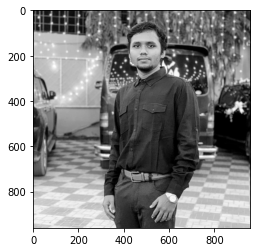

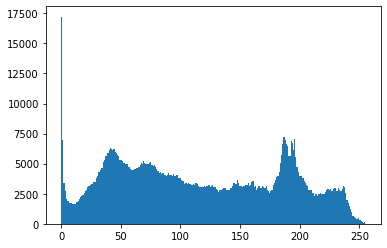

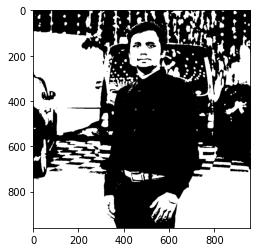

In [ ]:
import numpy as np
import cv2
from matplotlib import pyplot as plt


im = cv2.imread("abrar.jpg",0)
im_flat = np.reshape(im,(im.shape[0]*im.shape[1]))

[hist, _] = np.histogram(im, bins=256, range=(0, 255))
# Normalization so we have probabilities-like values (sum=1)
hist = 1.0*hist/np.sum(hist)

val_max = -999
thr = -1
for t in range(1,255):
    # Non-efficient implementation
    q1 = np.sum(hist[:t])
    q2 = np.sum(hist[t:])
    m1 = np.sum(np.array([i for i in range(t)])*hist[:t])/q1
    m2 = np.sum(np.array([i for i in range(t,256)])*hist[t:])/q2
    val = q1*(1-q1)*np.power(m1-m2,2)
    if val_max < val:
        val_max = val
        thr = t

print("Threshold: {}".format(thr))


#plt.subplot(131)
plt.imshow(im, cmap = 'gray')
plt.show()
#plt.subplot(132)
plt.hist(im_flat, bins=256, range=(0, 255))
plt.show()
#plt.subplot(133)
plt.imshow(im > thr, cmap = 'gray')
plt.show()


In [ ]:
# from os import POSIX_FADV_SEQUENTIAL
# img = cv2.imread("abrar.jpg",0)
# # height X weight 
# pixl_number = img.shape[0]*img.shape[1]
# mean_weight = 1.0/pixl_number
# im_flat = np.reshape(img,(img.shape[0]*img.shape[1]))
# # hist : array(values of histogram), bin_eg : array_float(bin edges)
# hst,bin_eg = np.histogram(img, np.array(range(0,256)))

# final_value = -1
# final_thres= -1

# """As we use Between Class Variance, we only need weights and mean values"""

# for t in bin_eg[1:-1]:

#   # weights
#   Wb=np.sum(hst[:t])*mean_weight
#   Wf=np.sum(hst[t:])*mean_weight

#   # mean
#   mub=np.mean(hst[:t])
#   muf=np.mean(hst[t:])

#   # between class variance (needs to be maximized)
#   value=Wb*Wf*(mub-muf)**2
#   if value>final_value:
#     final_value=value
#     final_thres = t


# final_img=img.copy()
# final_img[img>final_thres] = 255
# final_img[img<final_thres] = 0
# # print(final_img)


# from PIL import Image as im
# imm=im.fromarray(final_img)
# print("Final threshold value T:", final_thres)
# plt.imshow(imm,cmap="gray")
# plt.show()
# plt.hist(im_flat, bins=256, range=(0, 255))
# plt.show()

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

img = cv2.imread(filepath)

#taking height width center:
h,w,c = img.shape
#display(img)
#cv2.imshow(img) #use matplotlib
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img = cv2.resize(img, (5,5))

#grayscale conversion
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

#grayscale to binary image
val_b, img_b = cv2.threshold(img, 127.0, 255.0, cv2.THRESH_BINARY)

val_0, img_0 = cv2.threshold(img, 127.0, 255.0, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

# rotation
#img = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

#specific rotation angle
# mat = cv2.getRotationMatrix2D((h/2.0, w/2.0), -30, 1.0)
# img = cv2.warpAffine(img, mat,(h,w), borderValue=255.0)

#transformation
# tx=w/4.0
# ty=h/4.0
# mat = np.array([[1,0,-tx],[0,1,-ty]], dtype=np.float32)
# img = cv2.warpAffine(img,mat,(w,h))

print(val_b);
plt.imshow(img_b, cmap='gray');

print(val_0);
plt.imshow(img_0, cmap='gray');

#plt.imshow(img, cmap='gray');

#print(img.shape)
#print(type(img))

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
path = '/content/drive/MyDrive/dip/1.webp'
img = cv2.imread(path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
hist = cv2.calcHist([img],[0], None, [256], [0,256])
val_a,img_a=cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
kernel = np.ones((3,3),np.float32)
kernel2 = np.ones((7,7),np.float32)
kernel3 = np.ones((15,15),np.float32)

er01 = cv2.morphologyEx(img,cv2.MORPH_ERODE,kernel)
er02 = cv2.morphologyEx(img,cv2.MORPH_DILATE,kernel)
er03 = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel)

er11 = cv2.morphologyEx(img,cv2.MORPH_ERODE,kernel2)
er12 = cv2.morphologyEx(img,cv2.MORPH_DILATE,kernel2)
er13 = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel2)

er21 = cv2.morphologyEx(img,cv2.MORPH_ERODE,kernel3)
er22 = cv2.morphologyEx(img,cv2.MORPH_DILATE,kernel3)
er23 = cv2.morphologyEx(img,cv2.MORPH_GRADIENT,kernel3)

from matplotlib.gridspec import GridSpec
row = 3 ; col = 3 ;  
fig = plt.figure(figsize=(10,10))  
gs = GridSpec(row,col)
fig.add_subplot(gs[0,0])
plt.imshow(er01,cmap='gray')
fig.add_subplot(gs[1,0])
plt.plot(hist)
# plt.imshow(er02,cmap='gray')
# fig.add_subplot(gs[2])
# plt.imshow(er03,cmap='gray')
# fig.add_subplot(gs[3])

# plt.imshow(er11,cmap='gray')
# fig.add_subplot(gs[4])
# plt.imshow(er12,cmap='gray')
# fig.add_subplot(gs[5])
# plt.imshow(er13,cmap='gray')
# fig.add_subplot(gs[6])

# plt.imshow(er21,cmap='gray')
# fig.add_subplot(gs[7])
# plt.imshow(er22,cmap='gray')
# fig.add_subplot(gs[8])
# plt.imshow(er23,cmap='gray')
plt.show()


error: ignored

**dip lab 4 11 Aug, 2022**

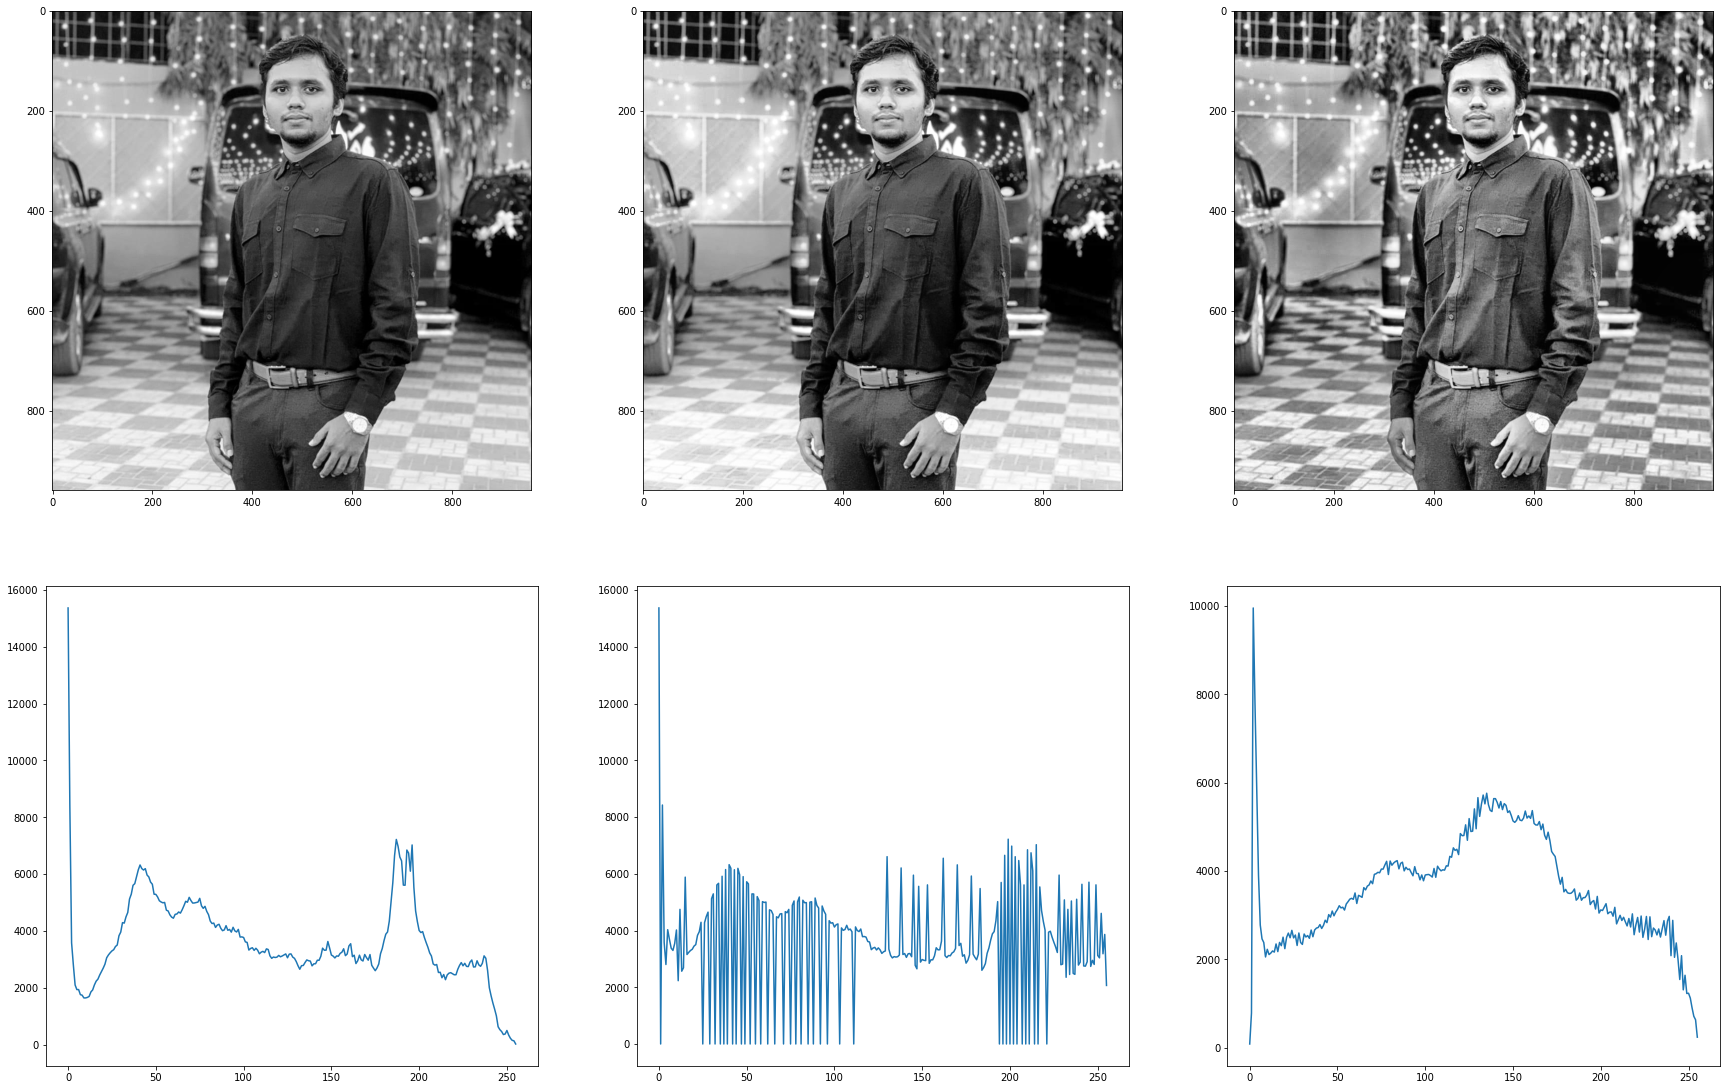

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
path = 'abrar.jpg'
img = cv2.imread(path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
hist = cv2.calcHist([img],[0], None, [256], [0,256])
img_eq = cv2.equalizeHist(img)
hist_eq = cv2.calcHist([img_eq],[0], None, [256], [0,256])

cl = cv2.createCLAHE(2.0, (8,8))
img_ad_eq = cl.apply(img) #noise reduction
hist_ad_eq = cv2.calcHist([img_ad_eq],[0], None, [256], [0,256])


from matplotlib.gridspec import GridSpec
row = 3 ; col = 3 ;  
fig = plt.figure(figsize=(30,30))  
gs = GridSpec(row,col)
fig.add_subplot(gs[0,0])
plt.imshow(img,cmap='gray')
fig.add_subplot(gs[1,0])
plt.plot(hist)

fig.add_subplot(gs[0,1])
plt.imshow(img_eq,cmap='gray')
fig.add_subplot(gs[1,1])
plt.plot(hist_eq)

fig.add_subplot(gs[0,2])
plt.imshow(img_ad_eq,cmap='gray')
fig.add_subplot(gs[1,2])
plt.plot(hist_ad_eq)


plt.show()


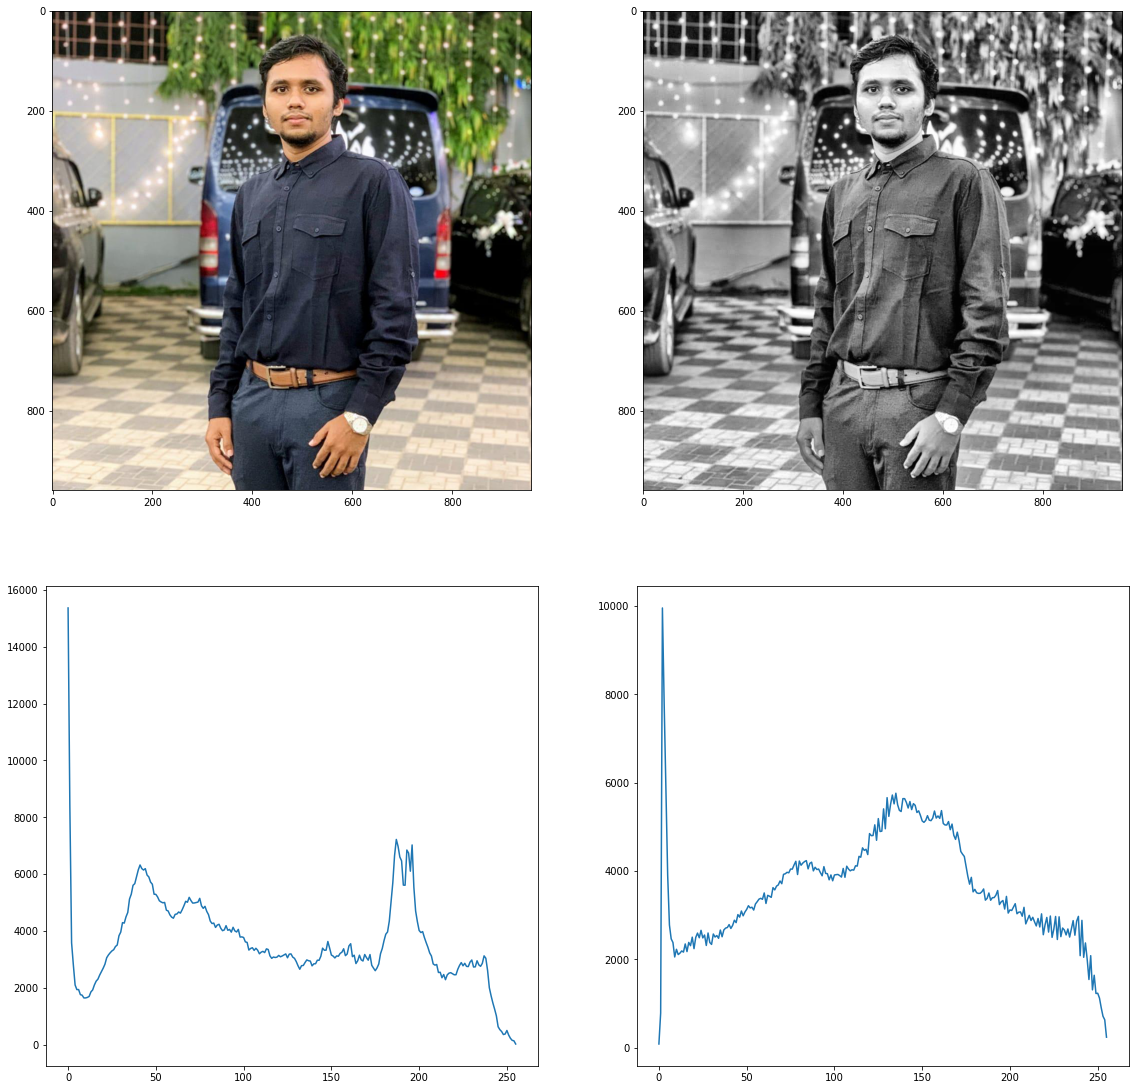

In [ ]:
from matplotlib.gridspec import GridSpec
from PIL import Image
imgx = Image.open(path)
row = 3 ; col = 3 ;  
fig = plt.figure(figsize=(30,30))  
gs = GridSpec(row,col)
fig.add_subplot(gs[0,0])
plt.imshow(imgx,cmap='gray')
fig.add_subplot(gs[1,0])
plt.plot(hist)

fig.add_subplot(gs[0,1])
plt.imshow(img_ad_eq,cmap='gray')
fig.add_subplot(gs[1,1])
plt.plot(hist_ad_eq)

plt.show()

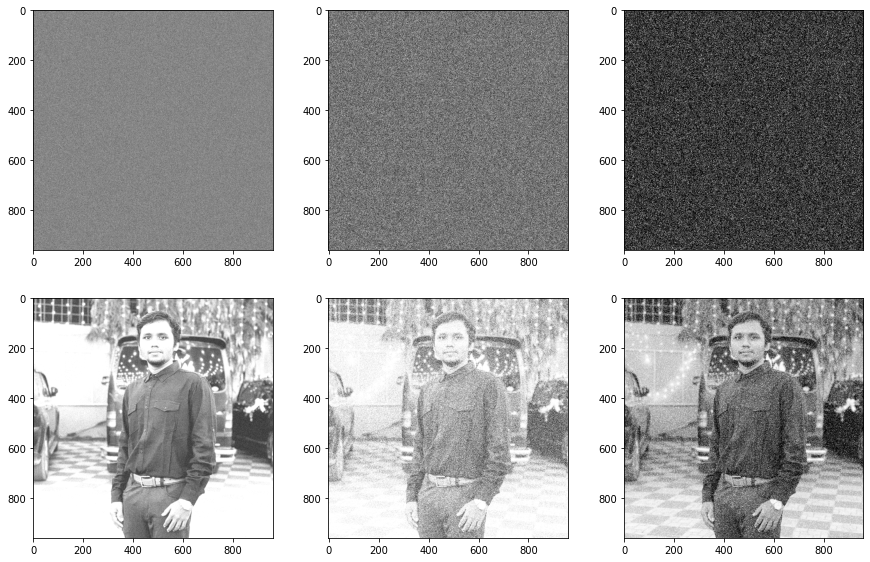

In [ ]:
#gaussina noise addition
#random noise addition


import cv2
import numpy as np
from matplotlib import pyplot as plt
path = 'abrar.jpg'
img = cv2.imread(path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)
# hist = cv2.calcHist([img],[0], None, [256], [0,256])
# img_eq = cv2.equalizeHist(img)
# hist_eq = cv2.calcHist([img_eq],[0], None, [256], [0,256])

# cl = cv2.createCLAHE(2.0, (8,8))
# img_ad_eq = cl.apply(img)
# hist_ad_eq = cv2.calcHist([img_ad_eq],[0], None, [256], [0,256])


gu_n = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8) #background box
#plt.imshow(gu_n)
cv2. randn(gu_n, 128, 20) #randonly white noise add n box
gu_n = (gu_n*0.7).astype(np.uint8) # 70% use of noise filter
gu_img = cv2.add(img, gu_n) #add

uf_n = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8) #same procedure
cv2.randu(uf_n, 0, 255)
uf_n = (uf_n*2.7).astype(np.uint8)
uf_img = cv2.add(img, uf_n)

#n=binarizeing uf_n
im_n = uf_n.copy()
ret, im_n = cv2.threshold(uf_n, 175, 255, cv2.THRESH_BINARY) 
im_n = (im_n*1.7).astype(np.uint8)
im_img = cv2.add(img, im_n)

from matplotlib.gridspec import GridSpec
row = 3 ; col = 3 ;  
fig = plt.figure(figsize=(15,15))  
gs = GridSpec(row,col)
fig.add_subplot(gs[0,0])
plt.imshow(gu_n,cmap='gray')
fig.add_subplot(gs[1,0])
plt.imshow(gu_img,cmap='gray')

fig.add_subplot(gs[0,1])
plt.imshow(uf_n,cmap='gray')
fig.add_subplot(gs[1,1])
plt.imshow(uf_img,cmap='gray')

fig.add_subplot(gs[0,2])
plt.imshow(im_n,cmap='gray')
fig.add_subplot(gs[1,2])
plt.imshow(im_img,cmap='gray')



plt.show()
 # singlecolor img/black box e noise generate kore pic e add

**Remove noise**

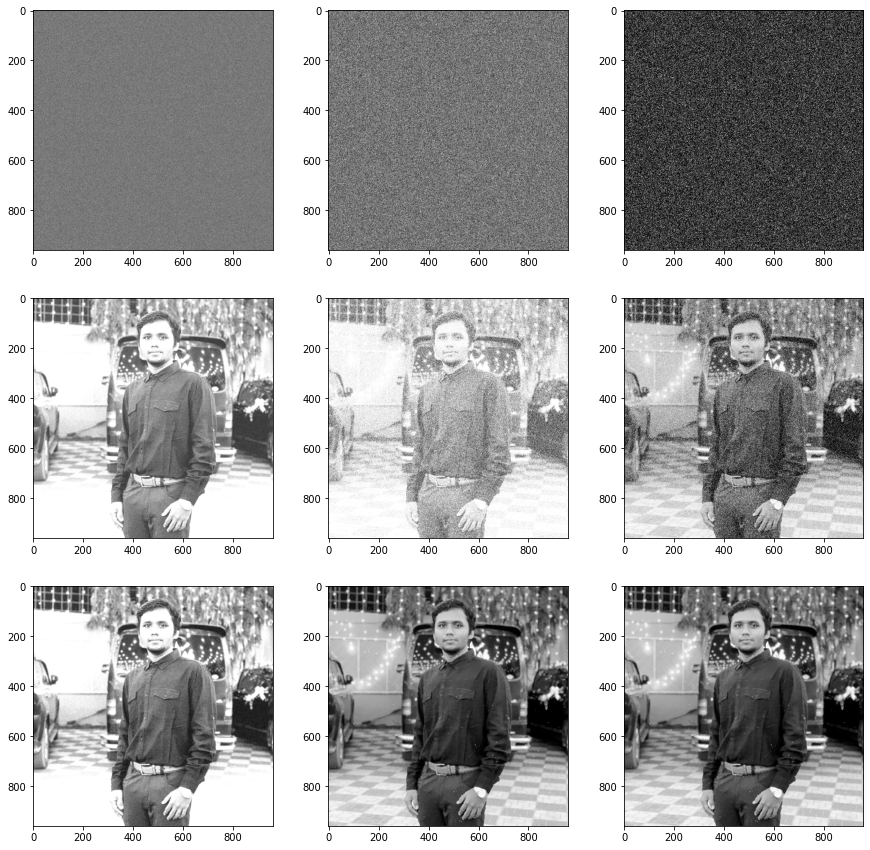

In [ ]:
#remove noise


import cv2
import numpy as np
from matplotlib import pyplot as plt
path = 'abrar.jpg'
img = cv2.imread(path)
img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img=cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)


gu_n = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
cv2. randn(gu_n, 128, 20)
gu_n = (gu_n*0.7).astype(np.uint8)
gu_img = cv2.add(img, gu_n)

gu_sm = cv2.GaussianBlur(gu_img, (5,5), 0.7)


uf_n = np.zeros((img.shape[0], img.shape[1]), dtype=np.uint8)
cv2.randu(uf_n, 0, 255)
uf_n = (uf_n*2.7).astype(np.uint8)
uf_img = cv2.add(img, uf_n)


#n=binarizeing uf_n
im_n = uf_n.copy()
ret, im_n = cv2.threshold(uf_n, 175, 255, cv2.THRESH_BINARY)
im_n = (im_n*1.7).astype(np.uint8)
im_img = cv2.add(img, im_n)

im_sm = cv2.medianBlur(im_img, 5)

from matplotlib.gridspec import GridSpec
row = 3 ; col = 3 ;  
fig = plt.figure(figsize=(15,15))  
gs = GridSpec(row,col)
fig.add_subplot(gs[0,0])
plt.imshow(gu_n,cmap='gray')
fig.add_subplot(gs[1,0])
plt.imshow(gu_img,cmap='gray')

fig.add_subplot(gs[0,1])
plt.imshow(uf_n,cmap='gray')
fig.add_subplot(gs[1,1])
plt.imshow(uf_img,cmap='gray')

fig.add_subplot(gs[0,2])
plt.imshow(im_n,cmap='gray')
fig.add_subplot(gs[1,2])
plt.imshow(im_img,cmap='gray')

fig.add_subplot(gs[2,0])
plt.imshow(gu_sm,cmap='gray')
fig.add_subplot(gs[2,1])
plt.imshow(im_sm,cmap='gray')
fig.add_subplot(gs[2,2])
plt.imshow(im_sm,cmap='gray')



plt.show()
